In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PCOS_data.csv to PCOS_data.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

In [ ]:
import pandas as pd
df = pd.read_csv('PCOS_data.csv')
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


RandomForest: Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RandomForest Accuracy: 93.84%
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        71
           1       0.93      0.95      0.94        75

    accuracy                           0.94       146
   macro avg       0.94      0.94      0.94       146
weighted avg       0.94      0.94      0.94       146

RandomForest Confusion Matrix:
[[66  5]
 [ 4 71]]


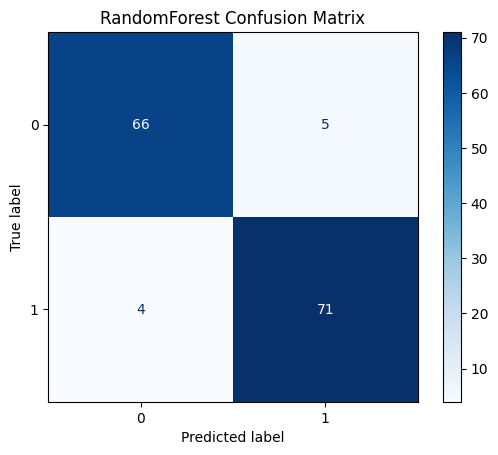

In [ ]:

import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
import os
import matplotlib.pyplot as plt

# Load Dataset
file_path = './PCOS_data.csv'  # Replace with the actual path
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}. Ensure the file is in the correct directory.")
import pandas as pd
data = pd.read_csv(file_path)

# Data Preprocessing
columns_to_drop = ['Sl. No', 'Patient File No.']
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Convert appropriate columns to numeric, handling errors
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill missing values in numeric columns
data.fillna(data.median(numeric_only=True), inplace=True)

# Encoding categorical columns if needed
data = pd.get_dummies(data, drop_first=True)

# Feature Selection using Mutual Information
target_column = 'PCOS (Y/N)'
if target_column not in data.columns:
    raise KeyError(f"Target column '{target_column}' not found in the dataset.")

X = data.drop(columns=[target_column])
y = data[target_column]

mutual_info_scores = mutual_info_classif(X, y)
selected_features = X.columns[np.argsort(mutual_info_scores)[-12:]]  # Top 12 features
X = X[selected_features]

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Models and Hyperparameter Grids
models = {
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': [200, 300],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    })
}

# Hyperparameter Tuning with GridSearchCV
best_models = {}
for name, (model, param_grid) in models.items():
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"{name}: Best Parameters: {grid.best_params_}")

# Evaluate Models
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2%}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} Confusion Matrix:\n{cm}")

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Best Parameters: {'learning_rate': 1.0, 'n_estimators': 50}
AdaBoost Accuracy: 90.41%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        71
           1       0.96      0.85      0.90        75

    accuracy                           0.90       146
   macro avg       0.91      0.91      0.90       146
weighted avg       0.91      0.90      0.90       146

Confusion Matrix:
[[68  3]
 [11 64]]


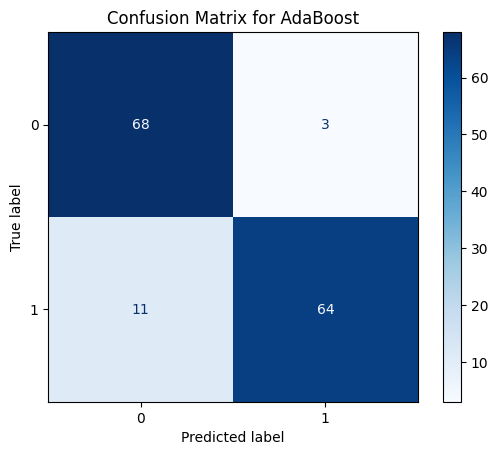

In [ ]:
 # File Path: pcos_adaboost_pipeline.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
import os
import matplotlib.pyplot as plt

# Load Dataset
file_path = './PCOS_data.csv'  # Replace with the actual path
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}. Ensure the file is in the correct directory.")

data = pd.read_csv(file_path)

# Data Preprocessing
columns_to_drop = ['Sl. No', 'Patient File No.']
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Convert appropriate columns to numeric, handling errors
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill missing values in numeric columns
data.fillna(data.median(numeric_only=True), inplace=True)

# Encoding categorical columns if needed
data = pd.get_dummies(data, drop_first=True)

# Feature Selection using Mutual Information
target_column = 'PCOS (Y/N)'
if target_column not in data.columns:
    raise KeyError(f"Target column '{target_column}' not found in the dataset.")

X = data.drop(columns=[target_column])
y = data[target_column]

mutual_info_scores = mutual_info_classif(X, y)
selected_features = X.columns[np.argsort(mutual_info_scores)[-12:]]  # Top 12 features
X = X[selected_features]

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize AdaBoost Classifier and Hyperparameter Grid
adaboost = AdaBoostClassifier(algorithm='SAMME.R', random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of weak classifiers
    'learning_rate': [0.01, 0.1, 0.5, 1.0]  # Learning rate for boosting
}

# Hyperparameter Tuning with GridSearchCV
grid = GridSearchCV(adaboost, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Best AdaBoost Model
best_adaboost = grid.best_estimator_
print(f"AdaBoost Best Parameters: {grid.best_params_}")

# Evaluate AdaBoost Model
y_pred = best_adaboost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy: {accuracy:.2%}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display Confusion Matrix as a Plot
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_adaboost.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for AdaBoost")
plt.show()


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}
XGBoost Accuracy: 94.52%
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        71
           1       0.94      0.96      0.95        75

    accuracy                           0.95       146
   macro avg       0.95      0.94      0.95       146
weighted avg       0.95      0.95      0.95       146



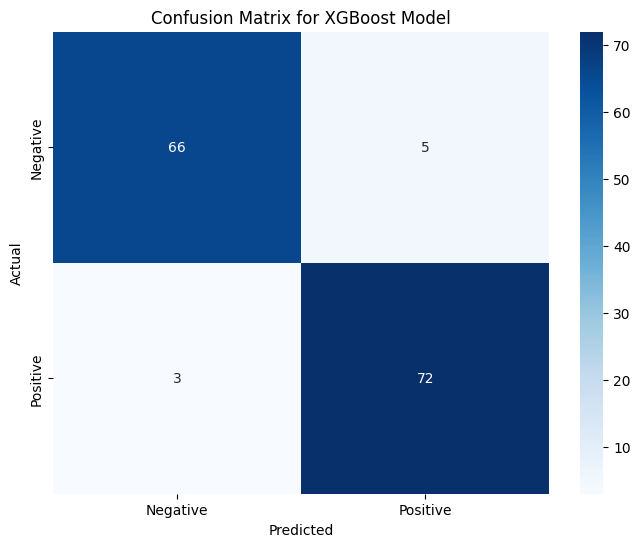

In [ ]:
# File Path: pcos_model_pipeline_xgboost.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
file_path = './PCOS_data.csv'  # Replace with the actual path
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}. Ensure the file is in the correct directory.")

data = pd.read_csv(file_path)

# Data Preprocessing
columns_to_drop = ['Sl. No', 'Patient File No.']
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Convert appropriate columns to numeric, handling errors
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill missing values in numeric columns
data.fillna(data.median(numeric_only=True), inplace=True)

# Encoding categorical columns if needed
data = pd.get_dummies(data, drop_first=True)

# Feature Selection using Mutual Information
target_column = 'PCOS (Y/N)'
if target_column not in data.columns:
    raise KeyError(f"Target column '{target_column}' not found in the dataset.")

X = data.drop(columns=[target_column])
y = data[target_column]

mutual_info_scores = mutual_info_classif(X, y)
selected_features = X.columns[np.argsort(mutual_info_scores)[-12:]]  # Top 12 features
X = X[selected_features]

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# XGBoost Model and Hyperparameter Tuning
xgb_model = XGBClassifier(eval_metric='logloss')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Best Model
best_xgb_model = grid.best_estimator_
print(f"Best Parameters: {grid.best_params_}")

# Evaluate Model
y_pred = best_xgb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {acc:.2%}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for XGBoost Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


LogisticRegression: Best Parameters: {'C': 1, 'solver': 'liblinear'}
LogisticRegression Accuracy: 91.78%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        71
           1       0.90      0.95      0.92        75

    accuracy                           0.92       146
   macro avg       0.92      0.92      0.92       146
weighted avg       0.92      0.92      0.92       146

Confusion Matrix:
[[63  8]
 [ 4 71]]


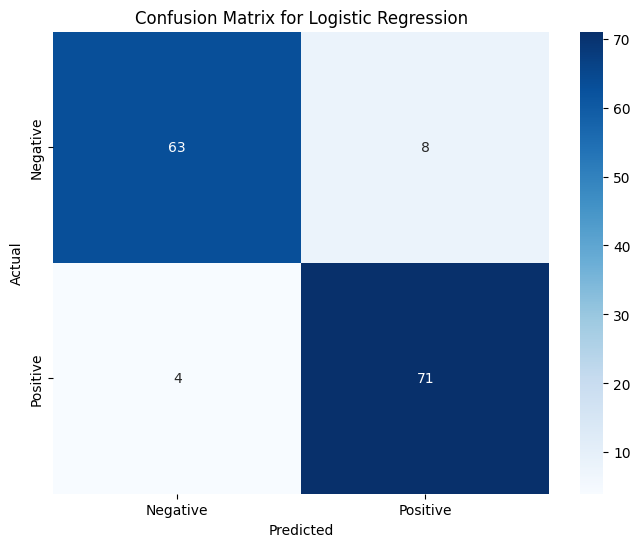

In [ ]:
# File Path: pcos_logistic_regression_pipeline.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load Dataset
file_path = './PCOS_data.csv'  # Replace with the actual path
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}. Ensure the file is in the correct directory.")

data = pd.read_csv(file_path)

# Data Preprocessing
columns_to_drop = ['Sl. No', 'Patient File No.']
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Convert appropriate columns to numeric, handling errors
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill missing values in numeric columns
data.fillna(data.median(numeric_only=True), inplace=True)

# Encoding categorical columns if needed
data = pd.get_dummies(data, drop_first=True)

# Feature Selection using Mutual Information
target_column = 'PCOS (Y/N)'
if target_column not in data.columns:
    raise KeyError(f"Target column '{target_column}' not found in the dataset.")

X = data.drop(columns=[target_column])
y = data[target_column]

mutual_info_scores = mutual_info_classif(X, y)
selected_features = X.columns[np.argsort(mutual_info_scores)[-12:]]  # Top 12 features
X = X[selected_features]

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Logistic Regression Model and Hyperparameter Grid
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
log_reg = LogisticRegression()

# Hyperparameter Tuning with GridSearchCV
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Best Logistic Regression Model
best_log_reg = grid.best_estimator_
print(f"LogisticRegression: Best Parameters: {grid.best_params_}")

# Evaluate the Logistic Regression Model
y_pred = best_log_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"LogisticRegression Accuracy: {acc:.2%}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


SVM: Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVM Accuracy: 91.10%
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        71
           1       0.92      0.91      0.91        75

    accuracy                           0.91       146
   macro avg       0.91      0.91      0.91       146
weighted avg       0.91      0.91      0.91       146

Confusion Matrix:
[[65  6]
 [ 7 68]]


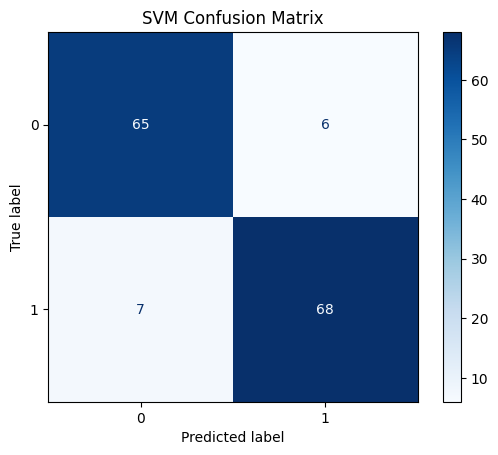

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
import os
import matplotlib.pyplot as plt

# Load Dataset
file_path = './PCOS_data.csv'  # Replace with the actual path
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}. Ensure the file is in the correct directory.")

data = pd.read_csv(file_path)

# Data Preprocessing
columns_to_drop = ['Sl. No', 'Patient File No.']
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Convert appropriate columns to numeric, handling errors
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill missing values in numeric columns
data.fillna(data.median(numeric_only=True), inplace=True)

# Encoding categorical columns if needed
data = pd.get_dummies(data, drop_first=True)

# Feature Selection using Mutual Information
target_column = 'PCOS (Y/N)'
if target_column not in data.columns:
    raise KeyError(f"Target column '{target_column}' not found in the dataset.")

X = data.drop(columns=[target_column])
y = data[target_column]

mutual_info_scores = mutual_info_classif(X, y)
selected_features = X.columns[np.argsort(mutual_info_scores)[-12:]]  # Top 12 features
X = X[selected_features]

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize SVM Model and Hyperparameter Grid
svm_model = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Hyperparameter Tuning with GridSearchCV
grid = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
best_svm_model = grid.best_estimator_
print(f"SVM: Best Parameters: {grid.best_params_}")

# Evaluate SVM Model
y_pred = best_svm_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {acc:.2%}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm_model.classes_)
disp.plot(cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()


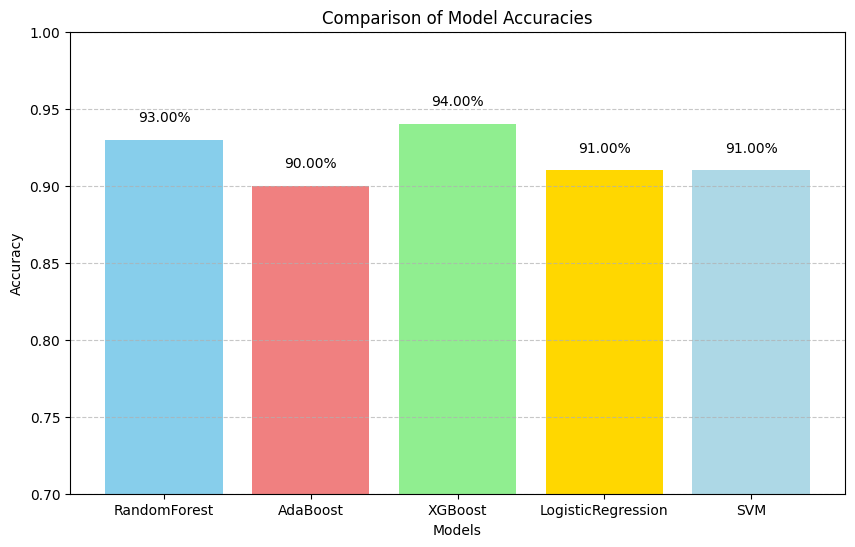

In [ ]:


import matplotlib.pyplot as plt

# Assuming you have already run the code and have the accuracy scores stored
# Replace these with the actual accuracy scores obtained from your code
model_names = ['RandomForest', 'AdaBoost', 'XGBoost', 'LogisticRegression', 'SVM']
accuracy_scores = [0.93, 0.90, 0.94, 0.91, 0.91] # Example accuracy scores


plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightblue'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0.7, 1.0) # Adjust y-axis limit as needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center', va='bottom', fontsize=10) # Display percentages on top of bars

plt.show()